In [1]:
# import sys,os
# #### Change "0" to GPU device number you want to use if you have multiple GPU devices
# os.environ['CUDA_VISIBLE_DEVICES'] ="0" 

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [3]:
import tensorflow as tf
import numpy as np
import aux_functions as af
import models as Mo
from attack import Attack
import sys
import time
import cifar_model
from discretization_utils import discretize_uniform

In [4]:
x_train,y_train,x_test,y_test = af.load_cifar10_dataset()

Sample Images ...


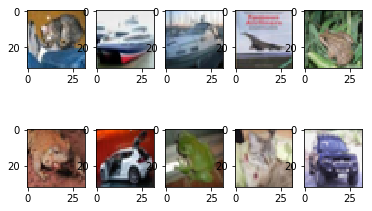

In [5]:
print 'Sample Images ...'
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])

In [6]:
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=True))
x = tf.placeholder(tf.float32,[None,32,32,3])
y = tf.placeholder(tf.float32,[None,10])

In [7]:
therm_model = cifar_model.Model('./trained_models/thermometer_advtrain/',
              sess, tiny=False, mode='eval',
              thermometer=True, levels=16)

Called
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
INFO:tensorflow:Restoring parameters from ./trained_models/thermometer_advtrain/checkpoint-68000
restored


In [8]:
target_model = Mo.ThermModel(x,y,sess,therm_model)
target_model.test_model(x_test,y_test)

In [26]:
sub_model1 = Mo.SimpleCNN4(x,y,sess,var_scope='simpleCNN4_1')

x_train_noisy,y_train_noisy = \
target_model.get_noisy_data_and_logits(x_test, nb_replica=8, 
                                       start_range=0, end_range=8, step=1, batch_size=512)

sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.001,nb_epochs=6)
sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.0005,nb_epochs=3)
sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.0001,nb_epochs=3)
sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.00005,nb_epochs=3)
sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.00001,nb_epochs=3)
sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.000005,nb_epochs=3)
sub_model1.SST_v2(x_train_noisy,y_train_noisy,lr=0.000001,nb_epochs=3)

sub_model1.test_model(x_train_noisy,y_train_noisy)

epoch: 6/6 iter: 600/625 ETA: 0:01 loss: 7.7227  
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 1.3149 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.6579 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.5495 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.5124 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.5049 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.5004 


In [28]:
sub_model2 = Mo.SimpleCNN4(x,y,sess,var_scope='simpleCNN4_2')

x_train_noisy2,y_train_noisy2 = \
target_model.get_noisy_data_and_logits(x_test, nb_replica=8, 
                                       start_range=3, end_range=11, step=1, batch_size=512)

sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.001,nb_epochs=6)
sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.0005,nb_epochs=3)
sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.0001,nb_epochs=3)
sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.00005,nb_epochs=3)
sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.00001,nb_epochs=3)
sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.000005,nb_epochs=3)
sub_model2.SST_v2(x_train_noisy2,y_train_noisy2,lr=0.000001,nb_epochs=3)

sub_model2.test_model(x_train_noisy2,y_train_noisy2)

x_train_noisy.shape (80000, 32, 32, 3)
 iter: 150/157 ETA: 0:16 
epoch: 6/6 iter: 600/625 ETA: 0:01 loss: 2.7033  
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.4146 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2585 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2233 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2049 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2013 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.1991 


In [29]:
sub_model3 = Mo.SimpleCNN4(x,y,sess,var_scope='simpleCNN4_3')

x_train_noisy3,y_train_noisy3 = \
target_model.get_noisy_data_and_logits(x_test, nb_replica=8, 
                                       start_range=6, end_range=14, step=1, batch_size=512)

sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.001,nb_epochs=6)
sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.0005,nb_epochs=3)
sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.0001,nb_epochs=3)
sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.00005,nb_epochs=3)
sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.00001,nb_epochs=3)
sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.000005,nb_epochs=3)
sub_model3.SST_v2(x_train_noisy3,y_train_noisy3,lr=0.000001,nb_epochs=3)

sub_model3.test_model(x_train_noisy3,y_train_noisy3)


x_train_noisy.shape (80000, 32, 32, 3)
 iter: 150/157 ETA: 0:16 
epoch: 6/6 iter: 600/625 ETA: 0:01 loss: 2.6257  
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.4747 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2899 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2463 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2243 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2199 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2174 
model accuracy is: 0.9710625


In [30]:
sub_model4 = Mo.SimpleCNN4(x,y,sess,var_scope='simpleCNN4_4')

x_train_noisy4,y_train_noisy4 = \
target_model.get_noisy_data_and_logits(x_test, nb_replica=8, 
                                       start_range=9, end_range=17, step=1, batch_size=512)

sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.001,nb_epochs=6)
sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.0005,nb_epochs=3)
sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.0001,nb_epochs=3)
sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.00005,nb_epochs=3)
sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.00001,nb_epochs=3)
sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.000005,nb_epochs=3)
sub_model4.SST_v2(x_train_noisy4,y_train_noisy4,lr=0.000001,nb_epochs=3)

sub_model4.test_model(x_train_noisy4,y_train_noisy4)


x_train_noisy.shape (80000, 32, 32, 3)
 iter: 150/157 ETA: 0:16 
epoch: 6/6 iter: 600/625 ETA: 0:01 loss: 2.5889  
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.5062 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.3011 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2493 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2243 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2192 
epoch: 3/3 iter: 600/625 ETA: 0:01 loss: 0.2164 
model accuracy is: 0.9711125


In [56]:
atk1 = Attack(x,y,[sub_model1,sub_model2,sub_model3,sub_model4],target_model,sess,100,lr=0.01)
index = 0
legit_img = x_test[index:index+100]
legit_y = y_test[index:index+100]


Crafting adversarial examples against Thermometer Encoding ...
run: 3/3 iter: 300/300 ETA: 0:00 success rate: 0.9900
Total attack time: 628.849701166
Success Rate:  0.99
AVG L2 norm of crafted Adv. Examples: 2.2242729579482776
Sample Adv. Examples ...


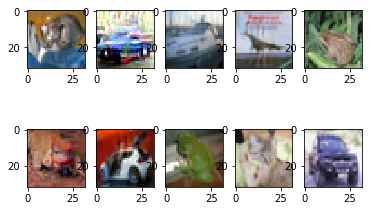

In [59]:
st = time.time()
print 'Crafting adversarial examples against Thermometer Encoding ...'
other_params = {
    'total_run':3,
    'total_iters':300,
    'kappa_vals': [10,20,40]
}
adv_img1 = atk1.find_adv(legit_img,legit_y,other_params=other_params)
print 'Total attack time:',time.time() - st

total_l2=0
not_found=0
not_found_indices = []
dset = adv_img1
for i in range(len(dset)):
    if np.sum(dset[i])==np.prod(dset.shape[1:])*10:
        not_found+=1
        not_found_indices.append(i)
        continue
    total_l2+= np.linalg.norm(x_test[index+i] - dset[i])
print 'Success Rate: ', (len(dset) - not_found)/(len(dset)+0.)
print 'AVG L2 norm of crafted Adv. Examples:',total_l2/(100.-not_found)
print 'Sample Adv. Examples ...'
for i in range(10):
    plt.subplot(2,5,i+1)
    if dset[i].sum() == np.prod(dset.shape[1:])*10:
        plt.imshow(np.zeros((32,32,3)))
    plt.imshow(dset[i])
